# Introduction
The purpose of this project is to evaluate the house price difference between Houston and Chicago.
Zillow provided Zillow Home Value Index(ZHVI) as a smoothed, seasonally adjusted measure of the typical home value across a given region and housing type.
I focused on single-family residences for my research.

# Section 1: Data Wrangling.

## <span style='color:blue'> Step 1: Extract house price data</span>
Load House price data from following webpage, https://www.zillow.com/research/data/. I used ZHVI Single-Family Homes Time Series in Metro & U.S from 1996-2020. The downloaded file name is called "Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv".

In [4]:
#load python packages
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import requests
import json
import seaborn as sns

In [5]:
os.getcwd()

'C:\\Users\\Grace-2019\\Documents\\Houston_Chicago_house_price'

In [6]:
# read the house price file
file1 = "Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv" 
df1 = pd.read_csv(file1, delimiter = ',')

In [7]:
df1.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,102001,0,United States,Country,NaN,106752.0,106784.0,106839.0,106974.0,107126.0,...,242460.0,243283.0,244088.0,244909.0,245771.0,246708.0,247737.0,248783.0,249707.0,250604.0
1,394913,1,"New York, NY",Msa,NY,192273.0,191824.0,191540.0,190990.0,190654.0,...,481362.0,481472.0,481698.0,482269.0,483093.0,484035.0,484956.0,485911.0,486824.0,487870.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,194120.0,194423.0,194458.0,194605.0,194608.0,...,705972.0,708697.0,710535.0,713159.0,716361.0,721125.0,725613.0,728709.0,728618.0,727713.0
3,394463,3,"Chicago, IL",Msa,IL,164910.0,164604.0,164198.0,163735.0,163116.0,...,246189.0,246205.0,246213.0,246338.0,246574.0,246841.0,247228.0,247432.0,247577.0,247747.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,112171.0,112242.0,112402.0,112720.0,113060.0,...,253838.0,254282.0,254687.0,254912.0,255366.0,256022.0,256977.0,258030.0,259028.0,260182.0
5,394974,5,"Philadelphia, PA",Msa,PA,123205.0,123051.0,122912.0,122671.0,122509.0,...,254062.0,254657.0,255177.0,255870.0,256645.0,257534.0,258135.0,259090.0,260083.0,261581.0
6,394692,6,"Houston, TX",Msa,TX,110240.0,110304.0,110312.0,110452.0,110592.0,...,218869.0,219367.0,219921.0,220480.0,220671.0,221051.0,221694.0,222559.0,223223.0,223709.0
7,395209,7,"Washington, DC",Msa,DC,189204.0,188967.0,188830.0,188540.0,188395.0,...,456607.0,458191.0,459800.0,461076.0,462081.0,462978.0,464225.0,466064.0,467831.0,469815.0
8,394856,8,"Miami-Fort Lauderdale, FL",Msa,FL,125265.0,125439.0,125614.0,125937.0,126218.0,...,345322.0,346312.0,347011.0,347527.0,348243.0,350031.0,351396.0,352685.0,353734.0,354828.0
9,394347,9,"Atlanta, GA",Msa,GA,121975.0,122206.0,122429.0,122922.0,123407.0,...,239395.0,240196.0,240975.0,241936.0,243053.0,244269.0,245396.0,246517.0,247571.0,248908.0


In [8]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,915.0,414861.361749,83829.704753,102001.0,394547.50,394802.0,395049.5,753929.0
SizeRank,915.0,460.206557,268.414169,0.0,228.50,457.0,689.5,933.0
1996-01-31,430.0,93191.404651,44910.141489,25765.0,62011.25,84616.0,111944.5,322545.0
1996-02-29,432.0,93192.766204,44732.356206,25782.0,62070.00,84691.0,111725.0,321175.0
1996-03-31,433.0,93206.399538,44663.928140,25791.0,62167.00,84701.0,111325.0,319635.0
...,...,...,...,...,...,...,...,...
2020-02-29,915.0,192355.950820,128859.834117,32560.0,117681.00,155440.0,226203.5,1238106.0
2020-03-31,915.0,192959.147541,129379.472267,32492.0,118147.00,155916.0,227227.5,1250734.0
2020-04-30,915.0,193507.190164,129752.783328,32402.0,118073.50,156280.0,228080.5,1256029.0
2020-05-31,915.0,194007.596721,130034.998537,32290.0,117971.00,157017.0,228599.0,1259468.0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Columns: 299 entries, RegionID to 2020-06-30
dtypes: float64(294), int64(2), object(3)
memory usage: 2.1+ MB


In [10]:
df1.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2020-02-29    float64
2020-03-31    float64
2020-04-30    float64
2020-05-31    float64
2020-06-30    float64
Length: 299, dtype: object

In [11]:
# read time series for houston and chicago price data
df_two_city = df1.iloc[[3,6]]
drop_column = ['RegionID','SizeRank','RegionName', 'RegionType','StateName']
df_two_city_ts = df_two_city.drop(drop_column, axis = 1).T
df_two_city_ts.index = pd.to_datetime(df_two_city_ts.index)
df_two_city_ts.rename(columns = {3:'Chicago',6:'Houston'},inplace = True)
df_two_city_ts.index.names = ['Date']
df_two_city_ts

,Chicago,Houston
Date,,
1996-01-31,164910.0,110240.0
1996-02-29,164604.0,110304.0
1996-03-31,164198.0,110312.0
1996-04-30,163735.0,110452.0
1996-05-31,163116.0,110592.0
...,...,...
2020-02-29,246841.0,221051.0
2020-03-31,247228.0,221694.0
2020-04-30,247432.0,222559.0


## <span style='color:blue'> Step 2: Extract Population Data.</span>
Load population data. The data was downloaded from https://www.census.gov/data/datasets/time-series/demo/popest/2010s-total-cities-and-towns.html. Data is in Excel format and has headers.

In [12]:
file2 = "SUB-IP-EST2019-ANNRNK.xlsx"
df2 = pd.read_excel(file2, header = 3)
df2.head(10)

,Unnamed: 0,Unnamed: 1,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,"New York city, New York",8175133,8175031.0,8190209.0,8272948.0,8346693.0,8396091.0,8433806.0,8463049.0,8469153.0,8437478.0,8390081.0,8336817.0
1,2,"Los Angeles city, California",3792621,3793139.0,3795512.0,3820876.0,3851202.0,3881622.0,3909901.0,3938568.0,3963226.0,3975788.0,3977596.0,3979576.0
2,3,"Chicago city, Illinois",2695598,2695652.0,2697477.0,2708114.0,2719141.0,2725731.0,2727066.0,2724344.0,2716723.0,2711069.0,2701423.0,2693976.0
3,4,"Houston city, Texas",2099451,2095517.0,2100280.0,2126032.0,2161593.0,2199391.0,2241826.0,2286908.0,2309544.0,2316750.0,2318573.0,2320268.0
4,5,"Phoenix city, Arizona",1445632,1446691.0,1449038.0,1469796.0,1499274.0,1526491.0,1555445.0,1583690.0,1612199.0,1633560.0,1654675.0,1680992.0
5,6,"Philadelphia city, Pennsylvania",1526006,1526012.0,1528283.0,1540466.0,1551824.0,1558313.0,1565460.0,1571065.0,1576051.0,1580601.0,1583592.0,1584064.0
6,7,"San Antonio city, Texas",1327407,1326161.0,1332299.0,1357120.0,1383075.0,1408339.0,1435456.0,1464043.0,1487843.0,1511154.0,1530016.0,1547253.0
7,8,"San Diego city, California",1307402,1301929.0,1305906.0,1319592.0,1336776.0,1355320.0,1375831.0,1387323.0,1402089.0,1412621.0,1421917.0,1423851.0
8,9,"Dallas city, Texas",1197816,1197658.0,1200350.0,1218282.0,1242115.0,1258835.0,1279098.0,1301329.0,1323916.0,1342479.0,1341802.0,1343573.0
9,10,"San Jose city, California",945942,952528.0,954940.0,970369.0,983530.0,1001279.0,1014273.0,1025980.0,1030242.0,1032335.0,1028020.0,1021795.0


In [13]:
df2.shape

(793, 14)

In [14]:
df2.columns

Index([    'Unnamed: 0',     'Unnamed: 1',         'Census', 'Estimates Base',
                   2010,             2011,             2012,             2013,
                   2014,             2015,             2016,             2017,
                   2018,             2019],
      dtype='object')

In [15]:
#load the merged 20 year population data for later modeling work
pop_raw = pd.read_csv('population_20years_record.csv', index_col = 'Date').dropna(axis = 1)
pop_raw.head()

,Chicago_population,Houston_population
Date,,
2000,2891582,1974324
2001,2874477,1979589
2002,2847266,1990408
2003,2819117,1992464
2004,2786291,1991817


In [16]:
pop_raw.dtypes

Chicago_population    int64
Houston_population    int64
dtype: object

In [17]:
pop_c = pop_raw[['Chicago_population']].astype('object')
pop_h = pop_raw[['Houston_population']].astype('object')

In [18]:
pop_h.head()

,Houston_population
Date,
2000,1974324
2001,1979589
2002,1990408
2003,1992464
2004,1991817


## <span style='color:blue'> Step 3: Extract GDP data.</span>
Pull out GDP data from the BEA (US Bureau of Economic Analysis) API. BEA published economic statistics using industry-standard methods and procedures.

In [19]:
# Method1 Get data from API
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = ''

In [20]:
# Now, call the BEA API and pull out a small sample of the data to get a glimpse
# into the JSON structure that will be returned
url = "https://apps.bea.gov/api/data/?UserID=API_KEY&method=GetParameterValuesFiltered&datasetname=Regional&TargetParameter=LineCode&TableNa"
r = requests.get(url)
json_data = r.json()
json_data

{'BEAAPI': {'Request': {'RequestParam': [{'ParameterName': 'TARGETPARAMETER',
     'ParameterValue': 'LINECODE'},
    {'ParameterName': 'METHOD',
     'ParameterValue': 'GETPARAMETERVALUESFILTERED'},
    {'ParameterName': 'TABLENA', 'ParameterValue': ''},
    {'ParameterName': 'USERID', 'ParameterValue': 'API_KEY'},
    {'ParameterName': 'DATASETNAME', 'ParameterValue': 'REGIONAL'}]},
  'Results': {'Error': {'APIErrorCode': '1',
    'APIErrorDescription': 'Invalid Request - Invalid API UserId.'}}}}

In [21]:
# method2, download data from BEA website.
# read GDP csv files for Chicago
gdp_c_raw = pd.read_csv('GDP_summary_Chicago.csv', header = 4).dropna()
gdp_c_raw.head()

,GeoFips,GeoName,LineCode,Description,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,16980,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",1.0,Real GDP (thousands of chained 2012 dollars),5.149820e+08,5.172946e+08,5.233121e+08,5.366621e+08,5.486324e+08,5.573862e+08,...,5.308302e+08,5.397048e+08,5.474993e+08,561588192.0,5.664995e+08,5.760001e+08,5.890500e+08,5.940608e+08,6.004220e+08,6.115911e+08
1,16980,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",2.0,Chain-type quantity indexes for real GDP,9.170100e+01,9.211300e+01,9.318400e+01,9.556100e+01,9.769300e+01,9.925200e+01,...,9.452300e+01,9.610300e+01,9.749100e+01,100.0,1.008750e+02,1.025660e+02,1.048900e+02,1.057820e+02,1.069150e+02,1.089040e+02
2,16980,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",3.0,Current-dollar GDP (thousands of current dollars),4.016221e+08,4.108182e+08,4.223338e+08,4.453680e+08,4.698541e+08,4.931725e+08,...,5.006113e+08,5.144260e+08,5.329617e+08,561588192.0,5.776643e+08,5.999194e+08,6.277343e+08,6.417297e+08,6.598550e+08,6.894647e+08


In [22]:
#clear the table and drop unneccessary columns
gdp_c = gdp_c_raw.iloc[[0]].drop(columns = ['GeoFips','GeoName','LineCode']).T
gdp_c.head()

,0
Description,Real GDP (thousands of chained 2012 dollars)
2001,5.14982e+08
2002,5.17295e+08
2003,5.23312e+08
2004,5.36662e+08


In [23]:
# take care the header problem
#grab the first row for the header
new_header = gdp_c.iloc[0] 
#take the data less the header row
gdp_c = gdp_c[1:]
#set the header row as the df header
gdp_c.columns = new_header 
gdp_c

Description,Real GDP (thousands of chained 2012 dollars)
2001,5.14982e+08
2002,5.17295e+08
2003,5.23312e+08
2004,5.36662e+08
2005,5.48632e+08
2006,5.57386e+08
2007,5.6412e+08
2008,5.48672e+08
2009,5.3083e+08
2010,5.39705e+08


In [24]:
# Read GDP csv files for Houston
gdp_h_raw = pd.read_csv('GDP_summary_Houston.csv', header = 4).dropna()
gdp_h_raw.head()

,GeoFips,GeoName,LineCode,Description,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,26420,"Houston-The Woodlands-Sugar Land, TX (Metropol...",1.0,Real GDP (thousands of chained 2012 dollars),2.973962e+08,2.946361e+08,2.953759e+08,3.208612e+08,3.261306e+08,3.488816e+08,...,3.659897e+08,3.813466e+08,3.907371e+08,404431385.0,4.194667e+08,4.204497e+08,4.427059e+08,4.291340e+08,4.323292e+08,4.453354e+08
1,26420,"Houston-The Woodlands-Sugar Land, TX (Metropol...",2.0,Chain-type quantity indexes for real GDP,7.353400e+01,7.285200e+01,7.303500e+01,7.933600e+01,8.063900e+01,8.626500e+01,...,9.049500e+01,9.429200e+01,9.661400e+01,100.0,1.037180e+02,1.039610e+02,1.094640e+02,1.061080e+02,1.068980e+02,1.101140e+02
2,26420,"Houston-The Woodlands-Sugar Land, TX (Metropol...",3.0,Current-dollar GDP (thousands of current dollars),2.130964e+08,2.112422e+08,2.202297e+08,2.478295e+08,2.674874e+08,2.972121e+08,...,3.246384e+08,3.498830e+08,3.804595e+08,404431385.0,4.237661e+08,4.307262e+08,4.464870e+08,4.304447e+08,4.475212e+08,4.787786e+08


In [25]:
# Drop unneccessary columns and tanspose data
gdp_h = gdp_h_raw.iloc[[0]].drop(columns = ['GeoFips','GeoName','LineCode']).T
gdp_h.head()

,0
Description,Real GDP (thousands of chained 2012 dollars)
2001,2.97396e+08
2002,2.94636e+08
2003,2.95376e+08
2004,3.20861e+08


In [26]:
new_header_h = gdp_h.iloc[0] #grab the first row for the header
gdp_h = gdp_h[1:] #take the data less the header row
gdp_h.columns = new_header_h #set the header row as the df header
gdp_h

Description,Real GDP (thousands of chained 2012 dollars)
2001,2.97396e+08
2002,2.94636e+08
2003,2.95376e+08
2004,3.20861e+08
2005,3.26131e+08
2006,3.48882e+08
2007,3.76389e+08
2008,3.69381e+08
2009,3.6599e+08
2010,3.81347e+08


## <span style='color:blue'> Step 4: Extract Employment data.</span>
Pull GDP and Employment data from the BEA (US Bureau of Economic Analysis) API. BEA published economic statistics using industry-standard methods and procedures.

In [27]:
# download data from BEA website.
# read GDP csv files for Chicago and Houston
job_raw = pd.read_csv('GDP_Personal _income _H _C.csv', header = 4).dropna()
job_raw.head()

,GeoFips,GeoName,LineCode,Description,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,16980,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",10.0,Personal income (thousands of dollars),240472614.0,255530533.0,271320981.0,289689942.0,303849857.0,328420542.0,...,408489123.0,418681182.0,439395786.0,464594859.0,474261503.0,503656560.0,528314915.0,535068699.0,552339301.0,580270144.0
2,16980,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",11.0,Nonfarm personal income 1/,240361657.0,255283431.0,271098513.0,289530322.0,303717598.0,328254694.0,...,408296160.0,418460523.0,438884161.0,464259052.0,473552496.0,503354816.0,528274806.0,534847754.0,552211586.0,580204553.0
3,16980,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",12.0,Farm income 2/,110957.0,247102.0,222468.0,159620.0,132259.0,165848.0,...,192963.0,220659.0,511625.0,335807.0,709007.0,301744.0,40109.0,220945.0,127715.0,65591.0
4,16980,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",20.0,Population (persons) 3/,8693383.0,8782253.0,8862719.0,8949190.0,9035654.0,9113234.0,...,9429498.0,9470880.0,9500991.0,9529773.0,9553268.0,9564614.0,9557880.0,9540144.0,9520784.0,9498716.0
5,16980,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",30.0,Per capita personal income (dollars) 4/,27662.0,29096.0,30614.0,32371.0,33628.0,36038.0,...,43320.0,44207.0,46247.0,48752.0,49644.0,52658.0,55275.0,56086.0,58014.0,61089.0


In [28]:
total_emp = job_raw['Description']=='Total employment'

In [29]:
job = job_raw[total_emp].T[4:].rename(columns = {24:'Chicago_Total_Employment',51:'Houston_Total_Employment'})
job.head()

,Chicago_Total_Employment,Houston_Total_Employment
1995,4.98942e+06,2.40245e+06
1996,5.07256e+06,2.47105e+06
1997,5.15979e+06,2.57986e+06
1998,5.29131e+06,2.70405e+06
1999,5.3574e+06,2.73575e+06


In [30]:
job_c = job[['Chicago_Total_Employment']]
job_c.head()

,Chicago_Total_Employment
1995,4.98942e+06
1996,5.07256e+06
1997,5.15979e+06
1998,5.29131e+06
1999,5.3574e+06


In [31]:
job_h = job[['Houston_Total_Employment']]
job_h.head()

,Houston_Total_Employment
1995,2.40245e+06
1996,2.47105e+06
1997,2.57986e+06
1998,2.70405e+06
1999,2.73575e+06


# Section 2: Data Exploratory Analysis.

## <span style='color:blue'> Step 1: Check house price data</span>

In [32]:
df_two_city_ts['1996']

,Chicago,Houston
Date,,
1996-01-31,164910.0,110240.0
1996-02-29,164604.0,110304.0
1996-03-31,164198.0,110312.0
1996-04-30,163735.0,110452.0
1996-05-31,163116.0,110592.0
1996-06-30,162779.0,110689.0
1996-07-31,162288.0,110727.0
1996-08-31,162855.0,110782.0
1996-09-30,163676.0,110946.0


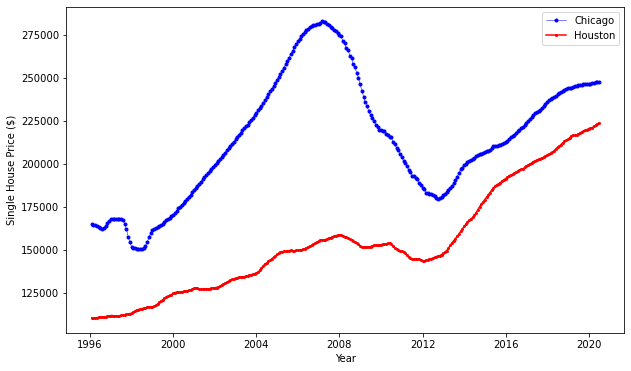

In [33]:
# Start and end of the date range to extract
start, end = '1996-01', '2020-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(df_two_city_ts.loc[start:end, 'Chicago'],
marker = '.', linestyle = '-', linewidth = 0.5,color = 'blue', label = 'Chicago')
ax.plot(df_two_city_ts.loc[start:end, 'Houston'],
marker = 'o', markersize = 2, linestyle = '-', color = 'red',label = 'Houston')
ax.set_ylabel('Single House Price ($)')
ax.set_xlabel('Year')
ax.legend();

Correlation of Chicago and Houston:  0.5500171590106966


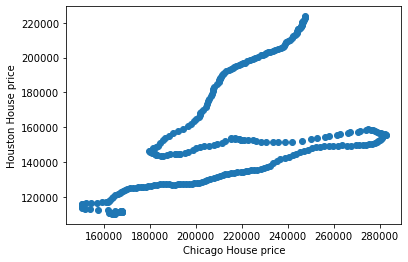

In [34]:
# Compare the two cities house price
# Compute correlation using corr()
plt.figure()
correlation_1 = df_two_city_ts['Chicago'].corr(df_two_city_ts['Houston'])
print("Correlation of Chicago and Houston: ", correlation_1)
# Make scatter plot
plt.scatter(df_two_city_ts['Chicago'],df_two_city_ts['Houston'])
plt.xlabel('Chicago House price')
plt.ylabel('Houston House price')
plt.show()

Correlation of Chicago and Houston:  0.4998969802424079


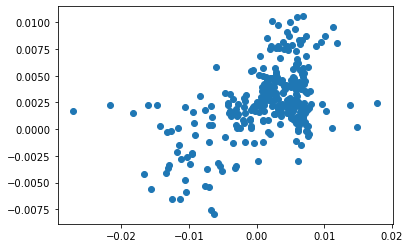

In [35]:
# compute changes
df_house_change = df_two_city_ts.pct_change()
# Compute correlation using corr()
correlation = df_house_change['Chicago'].corr(df_house_change['Houston'])
print("Correlation of Chicago and Houston: ", correlation)
# Make scatter plot
plt.scatter(df_house_change['Chicago'],df_house_change['Houston'])
plt.show()

## <span style='color:blue'> Step 2: Check population data</span>

In [36]:
# Use 2019 July 1 estimation to select top ten cities. 
pop_2019_top10 = df2[2019][:10]
label = df2.iloc[:,1][:10]

In [37]:
label2 = label.str.split(',').str[0]
label2

0        New York city
1     Los Angeles city
2         Chicago city
3         Houston city
4         Phoenix city
5    Philadelphia city
6     San Antonio city
7       San Diego city
8          Dallas city
9        San Jose city
Name: Unnamed: 1, dtype: object

In [38]:
#simplify the city names for plotting
label3 = []
for word in label2:
    word = word.replace('city','')
    label3.append(word)
label3

['New York ',
 'Los Angeles ',
 'Chicago ',
 'Houston ',
 'Phoenix ',
 'Philadelphia ',
 'San Antonio ',
 'San Diego ',
 'Dallas ',
 'San Jose ']

In [39]:
pop_2019_top10

0    8336817.0
1    3979576.0
2    2693976.0
3    2320268.0
4    1680992.0
5    1584064.0
6    1547253.0
7    1423851.0
8    1343573.0
9    1021795.0
Name: 2019, dtype: float64

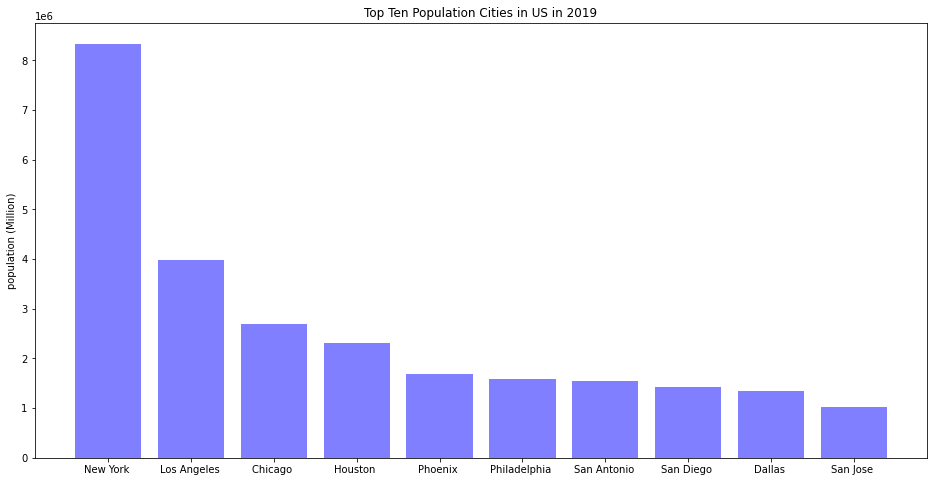

In [40]:
# Population distribution in top 10 US cities
plt.figure(figsize = (16,8))
y_pos = np.arange(len(label))
plt.bar(y_pos,pop_2019_top10, align = 'center', alpha = 0.5, color = 'blue')
plt.xticks(y_pos, label3)
plt.ylabel('population (Million)')
plt.title('Top Ten Population Cities in US in 2019')
plt.show()

In [41]:
# generate time series file for population of Houston and Chicago
df2_two_city = df2.iloc[[3,4]]
drop_column_p = ['Unnamed: 0', 'Unnamed: 1','Census','Estimates Base']
df_two_city_p = df2_two_city.drop(drop_column_p, axis = 1).T
df_two_city_p.rename(columns = {3:'Chicago',4:'Houston'},inplace = True)
df_two_city_p.index = pd.to_datetime(df_two_city_p.index,format = '%Y')
df_two_city_p

,Chicago,Houston
2010-01-01,2100280.0,1449038.0
2011-01-01,2126032.0,1469796.0
2012-01-01,2161593.0,1499274.0
2013-01-01,2199391.0,1526491.0
2014-01-01,2241826.0,1555445.0
2015-01-01,2286908.0,1583690.0
2016-01-01,2309544.0,1612199.0
2017-01-01,2316750.0,1633560.0
2018-01-01,2318573.0,1654675.0
2019-01-01,2320268.0,1680992.0


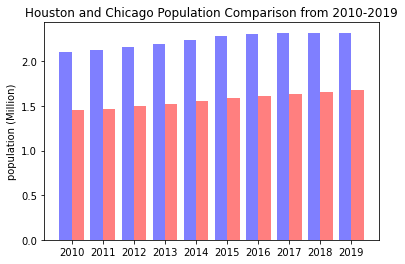

In [42]:
# Population comparison beween Chicago and Houston over the last ten years
ax = plt.subplot(111)
y_pos = np.arange(len(df_two_city_p))
w = 0.2
y_label_p = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
t1 = ax.bar(y_pos-w,df_two_city_p['Chicago']/1e6, width = 0.4, align = 'center', alpha = 0.5, color = 'blue')
t2 = ax.bar(y_pos+w,df_two_city_p['Houston']/1e6, width = 0.4, alpha = 0.5, color = 'red')
plt.xticks(y_pos, y_label_p)
plt.ylabel('population (Million)')
plt.title('Houston and Chicago Population Comparison from 2010-2019')
#ax.legend([t1,t2],['C','H'])
plt.show()

# Section 3: Linear Regression Model

## <span style='color:blue'> Step 1 Preprocessing data</span>
As GDP, employment data, population data are recorded on yearly basis, I resample the house price to every year for following linear regression analysis.

In [43]:
# Create two seperate time series for Chicago and Houston house price
house_c = df_two_city_ts['Chicago']
house_h = df_two_city_ts['Houston']

In [44]:
#resample Chicago and Houston House Price from monthly to yearly to be consisent with population, GDP and employment data.
house_c_a = house_c.resample('A',axis = 0).mean().to_frame()
house_h_a = house_h.resample('A',axis = 0).mean().to_frame()

In [45]:
house_c_a.index = house_c_a.index.strftime('%Y')
house_h_a.index = house_h_a.index.strftime('%Y')

In [46]:
house_h_a

,Houston
Date,
1996,110770.666667
1997,112007.500000
1998,115692.000000
1999,121003.500000
2000,125962.416667
2001,127369.583333
2002,130712.916667
2003,134868.083333
2004,142466.750000


In [47]:
# merge house price and GDP data for Chicago
two_col_c = house_c_a.join(gdp_c, how = 'left', sort = False)
# merge house price, GOP, employment, for Chicago and Houston
three_col_c = two_col_c.join(job_c, how = 'left', sort = False)
# merge house price, GOP, employment, population for Chicago and Houston
data_mod_c = three_col_c.join(pop_c, how = 'left', sort = False)
#data_mod_c=three_col_c
data_mod_c.head(10)
#data_mod_c.to_csv('Chicago_data_for_modeling.csv')


,Chicago,Real GDP (thousands of chained 2012 dollars),Chicago_Total_Employment,Chicago_population
Date,,,,
1996,164324.000000,NaN,5.07256e+06,NaN
1997,163806.750000,NaN,5.15979e+06,NaN
1998,153246.750000,NaN,5.29131e+06,NaN
1999,165807.083333,NaN,5.3574e+06,NaN
2000,177952.333333,NaN,5.46265e+06,NaN
2001,192719.000000,5.14982e+08,5.45027e+06,NaN
2002,207235.166667,5.17295e+08,5.38696e+06,NaN
2003,222490.500000,5.23312e+08,5.38703e+06,NaN
2004,239666.416667,5.36662e+08,5.44623e+06,NaN


In [48]:
data_mod_c['Chicago_population']

Date
1996    NaN
1997    NaN
1998    NaN
1999    NaN
2000    NaN
2001    NaN
2002    NaN
2003    NaN
2004    NaN
2005    NaN
2006    NaN
2007    NaN
2008    NaN
2009    NaN
2010    NaN
2011    NaN
2012    NaN
2013    NaN
2014    NaN
2015    NaN
2016    NaN
2017    NaN
2018    NaN
2019    NaN
2020    NaN
Name: Chicago_population, dtype: object

In [49]:
# merge house price and GDP data for Houston
two_col_h = house_h_a.join(gdp_h, how = 'left', sort = False)
# merge house price, GOP, employment, for Houston
three_col_h = two_col_h.join(job_h, how = 'left', sort = False)
# merge house price, GOP, employment, population data for Houston
data_mod_h = three_col_h.join(pop_h, how = 'left', sort = False)
#optional, write out data to csv file
#data_mod_h=three_col_h
#data_mod_h.to_csv('Houston_data_for_modeling.csv')
data_mod_h.head(10)

,Houston,Real GDP (thousands of chained 2012 dollars),Houston_Total_Employment,Houston_population
Date,,,,
1996,110770.666667,NaN,2.47105e+06,NaN
1997,112007.500000,NaN,2.57986e+06,NaN
1998,115692.000000,NaN,2.70405e+06,NaN
1999,121003.500000,NaN,2.73575e+06,NaN
2000,125962.416667,NaN,2.81797e+06,NaN
2001,127369.583333,2.97396e+08,2.87753e+06,NaN
2002,130712.916667,2.94636e+08,2.90105e+06,NaN
2003,134868.083333,2.95376e+08,2.92154e+06,NaN
2004,142466.750000,3.20861e+08,2.9741e+06,NaN


In [50]:
# Fix houston population concatenation problem
houston_pop = [0,0,0,0,1974324,1979589,1990408,1992464,1991817,1995773,2038721,2044612,2060477,2087334,2108946,2126032,2161593,2199391,2241826,2286908,2309544,2316750,2318573,2320268, 0]
data_mod_h['Houston_population'] = houston_pop

# Fix Chicago population concatenation problem
chicago_pop = [0,0,0,0,2891582,2874477,2847266,2819117,2786291,2752523,2720181,2703991,2697359,2697006,2698838,2708114,2719141,2725731,2727066,2724344,2716723,2711069,2701423,2693976, 0]
data_mod_c['Chicago_population'] = chicago_pop

In [51]:
# Clean data, drop all NA rows to honor the recorded Houston data.
data_mod_h_final = data_mod_h.dropna()
data_mod_h_final = data_mod_h_final.rename(columns = {'Houston':'Houston_house_price'})
data_mod_h_final.head()

,Houston_house_price,Real GDP (thousands of chained 2012 dollars),Houston_Total_Employment,Houston_population
Date,,,,
2001,127369.583333,2.97396e+08,2.87753e+06,1979589
2002,130712.916667,2.94636e+08,2.90105e+06,1990408
2003,134868.083333,2.95376e+08,2.92154e+06,1992464
2004,142466.750000,3.20861e+08,2.9741e+06,1991817
2005,149148.750000,3.26131e+08,3.07839e+06,1995773


In [52]:
# Clean data, drop all NA rows to honor the recorded Chicago data.
data_mod_c_final = data_mod_c.dropna()
data_mod_c_final = data_mod_c_final.rename(columns = {'Chicago':'Chicago_house_price'})
data_mod_c_final.head()

,Chicago_house_price,Real GDP (thousands of chained 2012 dollars),Chicago_Total_Employment,Chicago_population
Date,,,,
2001,192719.000000,5.14982e+08,5.45027e+06,2874477
2002,207235.166667,5.17295e+08,5.38696e+06,2847266
2003,222490.500000,5.23312e+08,5.38703e+06,2819117
2004,239666.416667,5.36662e+08,5.44623e+06,2786291
2005,260888.166667,5.48632e+08,5.52826e+06,2752523


In [53]:
# Make sure all data types is float64
data_mod_c_final = data_mod_c_final.astype('float64')
data_mod_h_final = data_mod_h_final.astype('float64')

## <span style='color:blue'> Step 2 Data Exploratory Analysis</span>

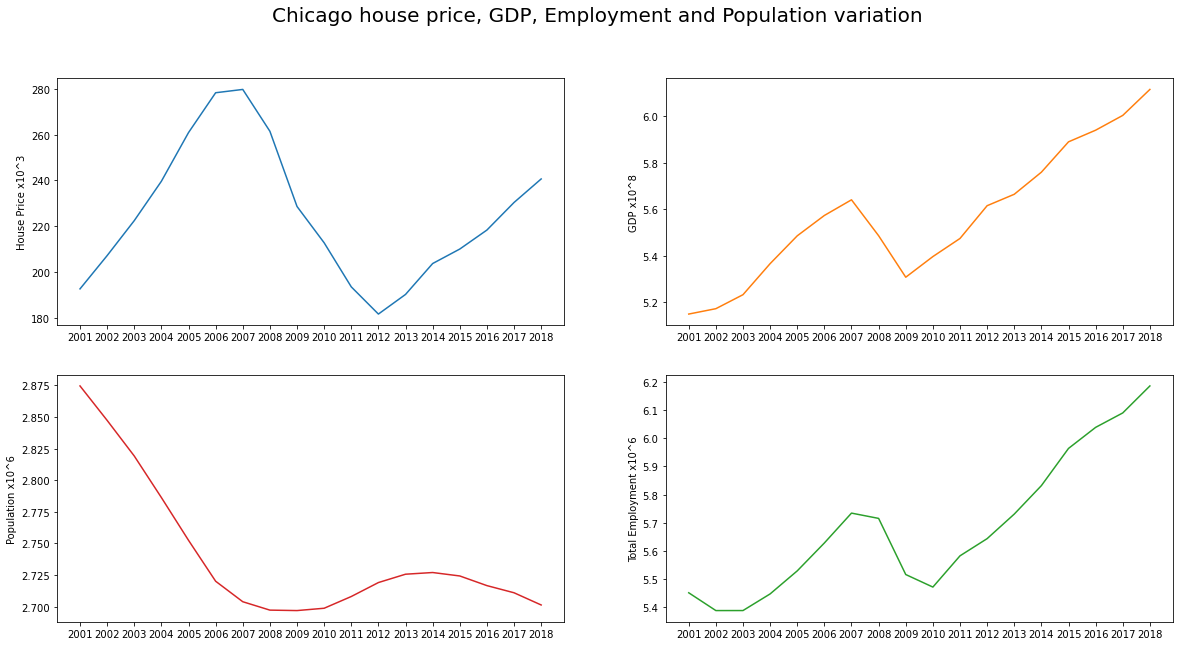

In [54]:
# Plot Chicago four features variation with time.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,10))
fig.suptitle('Chicago house price, GDP, Employment and Population variation',fontsize = 20)
ax1.plot(data_mod_c_final.index, data_mod_c_final['Chicago_house_price']/1e3)
ax2.plot(data_mod_c_final.index, data_mod_c_final['Real GDP (thousands of chained 2012 dollars)']/1e8, 'tab:orange')
ax3.plot(data_mod_c_final.index,data_mod_c_final['Chicago_population']/1e6, 'tab:red')
ax4.plot(data_mod_c_final.index, data_mod_c_final['Chicago_Total_Employment']/1e6, 'tab:green')
ax1.set_ylabel('House Price x10^3')
ax2.set_ylabel('GDP x10^8')
ax3.set_ylabel('Population x10^6')
ax4.set_ylabel('Total Employment x10^6')
plt.show()

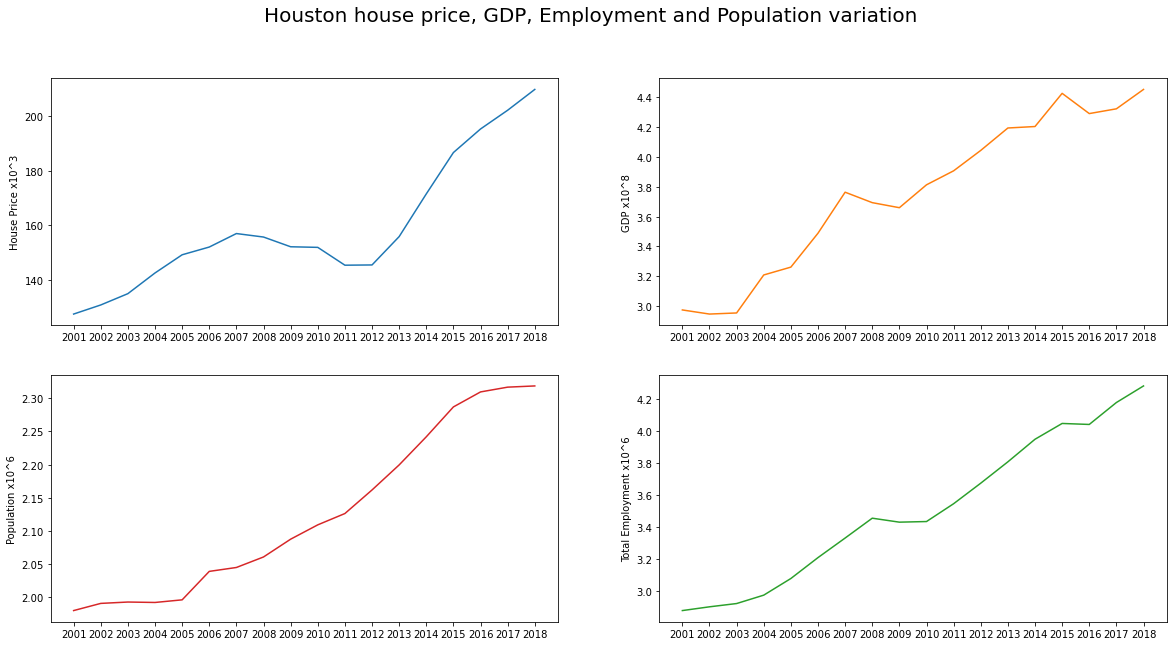

In [55]:
# Plot Houston four features variation with time.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,10))
fig.suptitle('Houston house price, GDP, Employment and Population variation',fontsize=20)
ax1.plot(data_mod_h_final.index, data_mod_h_final['Houston_house_price']/1e3, 'tab:blue')
ax2.plot(data_mod_h_final.index, data_mod_h_final['Real GDP (thousands of chained 2012 dollars)']/1e8, 'tab:orange')
ax3.plot(data_mod_h_final.index, data_mod_h_final['Houston_population']/1e6, 'tab:red')
ax4.plot(data_mod_h_final.index, data_mod_h_final['Houston_Total_Employment']/1e6, 'tab:green')
ax1.set_ylabel('House Price x10^3')
ax2.set_ylabel('GDP x10^8')
ax3.set_ylabel('Population x10^6')
ax4.set_ylabel('Total Employment x10^6')
plt.show()

In [56]:
data_mod_c_final.describe()

,Chicago_house_price,Real GDP (thousands of chained 2012 dollars),Chicago_Total_Employment,Chicago_population
count,18.000000,1.800000e+01,1.800000e+01,1.800000e+01
mean,225160.925926,5.571282e+08,5.684913e+06,2.740592e+06
std,29942.171267,2.858769e+07,2.486408e+05,5.430212e+04
min,181739.833333,5.149820e+08,5.386960e+06,2.697006e+06
25%,204643.354167,5.374228e+08,5.481764e+06,2.705022e+06
50%,220435.875000,5.530293e+08,5.635312e+06,2.719661e+06
75%,240419.604167,5.736249e+08,5.807252e+06,2.746159e+06
max,279712.083333,6.115911e+08,6.186561e+06,2.874477e+06


In [57]:
data_mod_h_final.describe()

,Houston_house_price,Real GDP (thousands of chained 2012 dollars),Houston_Total_Employment,Houston_population
count,18.000000,1.800000e+01,1.800000e+01,1.800000e+01
mean,159191.305556,3.756098e+08,3.508683e+06,2.125042e+06
std,24260.601008,5.194764e+07,4.643002e+05,1.250976e+05
min,127369.583333,2.946361e+08,2.877532e+06,1.979589e+06
25%,145344.375000,3.318184e+08,3.111127e+06,2.006510e+06
50%,152043.500000,3.788677e+08,3.445660e+06,2.098140e+06
75%,167872.770833,4.202039e+08,3.915224e+06,2.231217e+06
max,209897.250000,4.453354e+08,4.284476e+06,2.318573e+06


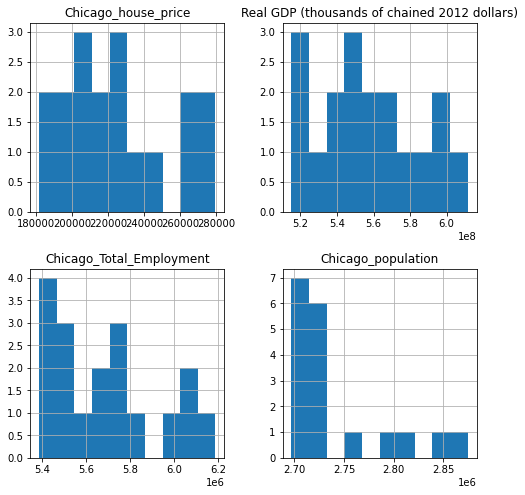

In [58]:
# Check histogram of Chicago data
hist=data_mod_c_final.hist(bins=10,figsize=(8,8))

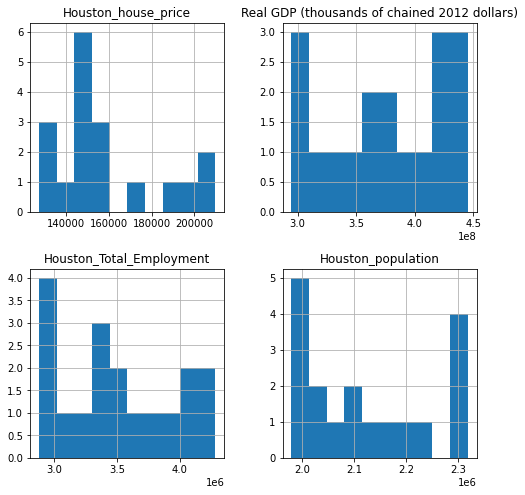

In [59]:
# Check histogram of Houston data
hist=data_mod_h_final.hist(bins=10,figsize=(8,8))

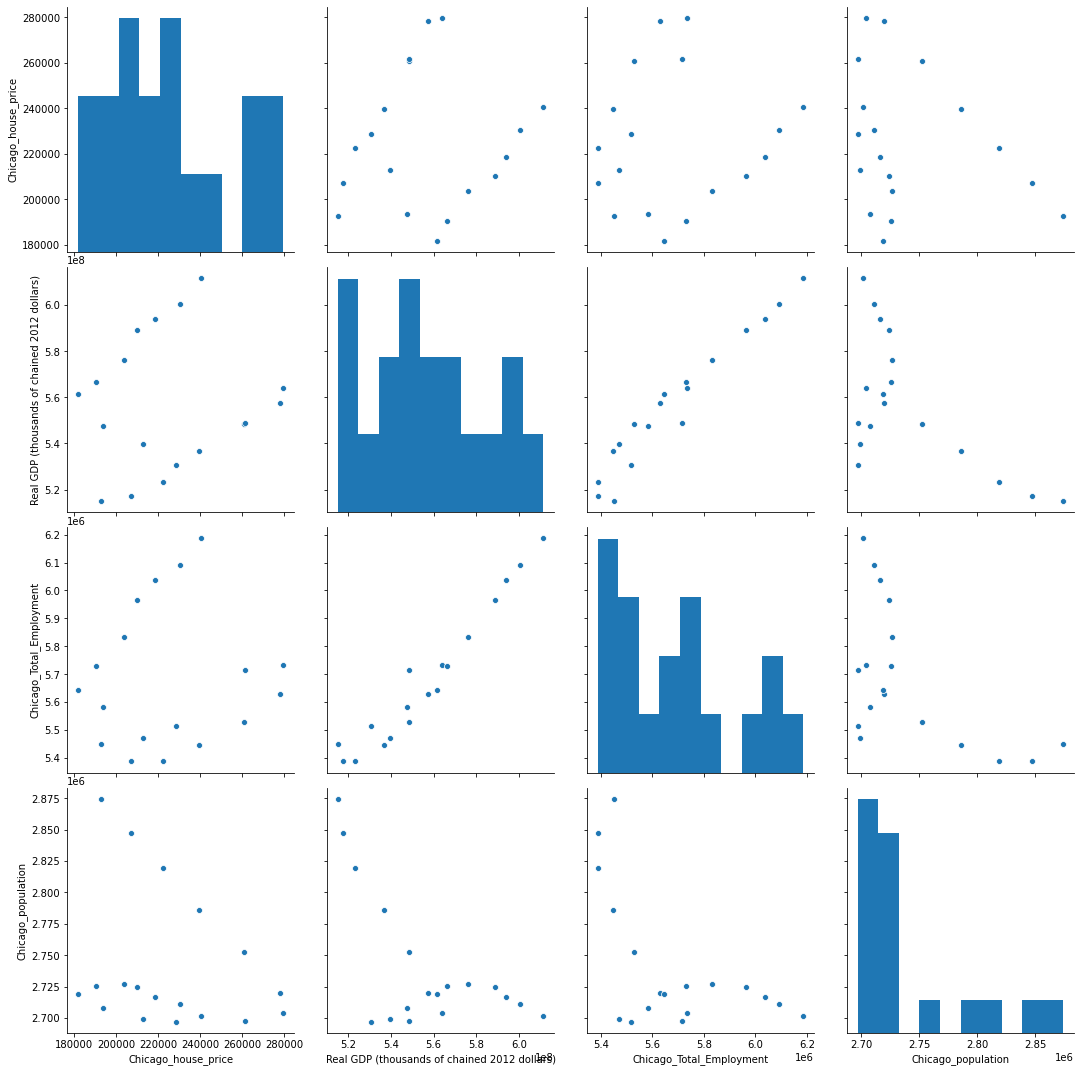

In [60]:
#Create pairplots or biplots to check relationship between variables.
# This is for Chicago data
g_c = sns.pairplot(data_mod_c_final)
g_c.fig.set_size_inches(15,15)

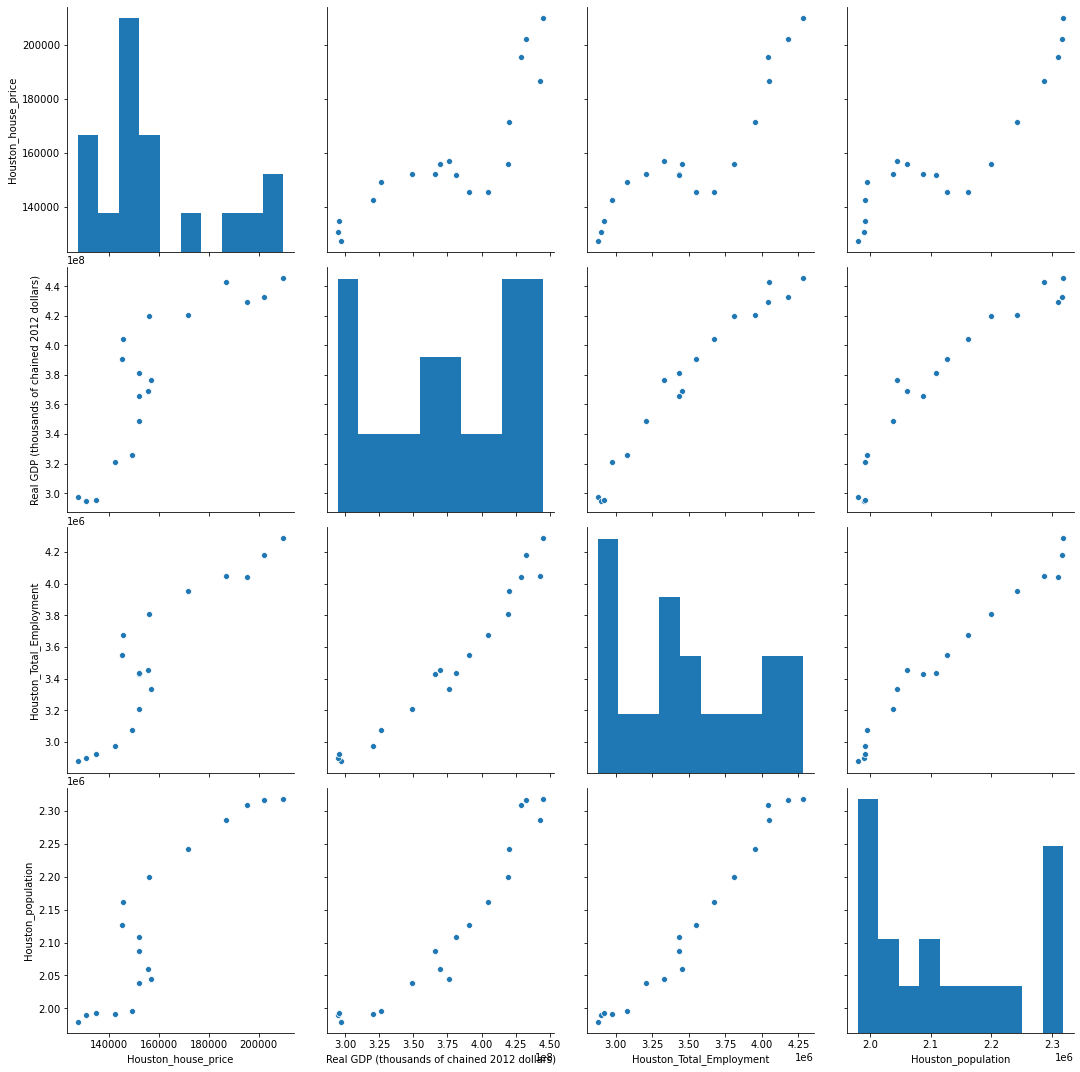

In [61]:
#Create pairplots or biplots to check relationship between variables.
# This is for Houston data
g_h = sns.pairplot(data_mod_h_final)
g_h.fig.set_size_inches(15,15)

In [62]:
# Calculate the correlation coefficients of Chicago data.
corr_c = data_mod_c_final.corr()
# plot it in the next line
corr_c.round(2).style.background_gradient(cmap = 'coolwarm')

,Chicago_house_price,Real GDP (thousands of chained 2012 dollars),Chicago_Total_Employment,Chicago_population
Chicago_house_price,1.000000,0.100000,0.090000,-0.260000
Real GDP (thousands of chained 2012 dollars),0.100000,1.000000,0.970000,-0.630000
Chicago_Total_Employment,0.090000,0.970000,1.000000,-0.560000
Chicago_population,-0.260000,-0.630000,-0.560000,1.000000


In [63]:
# Calculate the correlation coefficients of Houston data.
corr_h = data_mod_h_final.corr()
# Plot it in the next line
corr_h.round(2).style.background_gradient(cmap = 'coolwarm')

,Houston_house_price,Real GDP (thousands of chained 2012 dollars),Houston_Total_Employment,Houston_population
Houston_house_price,1.000000,0.840000,0.900000,0.900000
Real GDP (thousands of chained 2012 dollars),0.840000,1.000000,0.980000,0.940000
Houston_Total_Employment,0.900000,0.980000,1.000000,0.980000
Houston_population,0.900000,0.940000,0.980000,1.000000


## <span style='color:blue'> Step 3 Linear Regression Model - Houston</span>

In [64]:
# Import related modules.
from sklearn import preprocessing as pps
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

### <span style='color:blue'> Step3.1 Model 1 - Multivariable Linear Regression Model</span>

In [65]:
# Declare an explanatory variable, called X_h,and assign it the result of dropping 'Houston_house_price'
X_h =  data_mod_h_final.drop(['Houston_house_price'], axis = 1)
# Declare a response variable, called y_h, and assign it the Houston_house_price column 
y_h = data_mod_h_final.Houston_house_price 
# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X_h 
scaler_h = pps.StandardScaler().fit(X_h)
# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X_h 
X_h_scale = scaler_h.transform(X_h) 
# New training and test dataset for X_h, Spit 75% of the data to training set and 25% of data to test dataset
X_h_train, X_h_test, y_h_train, y_h_test = train_test_split(X_h_scale, y_h, test_size = 0.25, random_state = 1)
# running linear regression on model
lm_h = linear_model.LinearRegression()
model_h = lm_h.fit(X_h_train,y_h_train)
#compute predicted y2 from model
#y_h_pred = lm.predict(X_h_test)
y_h_pred = lm_h.predict(X_h_test)
#check variance and absolute mean errors for model2
variance_h = explained_variance_score(y_h_test,y_h_pred)
absmean_h = mean_absolute_error(y_h_test,y_h_pred)
# Optional,test on training data
#variance_h = explained_variance_score(y_h_train,y_h_pred)
#absmean_h = mean_absolute_error(y_h_train,y_h_pred)
# print variance and absolute mean errors
print('Variance is: '+str(variance_h)+';'+' Absolute mean errors is:'+str(absmean_h)+'.')
# get intercept and print it
Intercept_h = lm_h.intercept_
print('Intercept is:'+str(Intercept_h))
#print coefficient
coeff_h = lm_h.coef_
print('Coefficient is:'+str(coeff_h))

Variance is: 0.5635292633677346; Absolute mean errors is:12485.219812629328.
Intercept is:157519.28812239275
Coefficient is:[-38699.1555619   61567.68718077  -1527.66061872]


In [66]:
# Display the prediction results.
result_h = pd.DataFrame({'Actual':y_h_test, 'Predicted': y_h_pred})
result_h

,Actual,Predicted
Date,,
2007,156946.583333,133797.367543
2004,142466.750000,128218.705032
2014,171514.833333,181972.419523
2003,134868.083333,140575.389776
2015,186708.083333,177844.137662


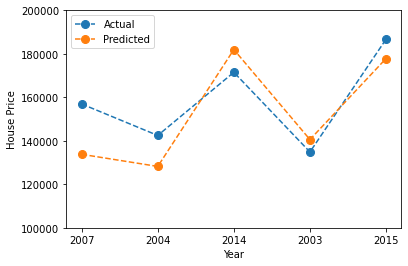

In [67]:
# Plot the prediction results.
plt.plot(result_h, linestyle = '--', marker = 'o', markersize = 8 )
plt.ylim(100000, 200000)
plt.legend(['Actual','Predicted'])
plt.xlabel('Year')
plt.ylabel('House Price')
plt.show()

### <span style='color:blue'> Step3.2 Model 2 - Single variable Linear Regression Model</span>

In [69]:
# Declare an explanatory variable X_h_1 containing only GDP and transform to numpy array
X_h_1 = data_mod_h_final['Real GDP (thousands of chained 2012 dollars)'].values.reshape(-1,1)
# Declare a response variable y_h_1 
y_h_1 = data_mod_h_final.Houston_house_price.values.reshape(-1,1)
# Spit 75% of the data to training set and 25% of data to test dataset
X_h_1_train, X_h_1_test, y_h_1_train, y_h_1_test = train_test_split(X_h_1, y_h_1, test_size = 0.25, random_state = 1)
# running linear regression on model
lm_h_1 = linear_model.LinearRegression()
model_h_1 = lm_h_1.fit(X_h_1_train,y_h_1_train)
#compute predicted y2 from model
y_h_1_pred = lm_h_1.predict(X_h_1_test)
#check variance and absolute mean errors for model2
variance_h_1 = explained_variance_score(y_h_1_test, y_h_1_pred)
absmean_h_1 = mean_absolute_error(y_h_1_test, y_h_1_pred)
# print variance and absolute mean errors
print('Variance is: '+str(variance_h_1)+';'+' Absolute mean errors is:'+str(absmean_h_1)+'.')
# get intercept and print it
Intercept_h_1 = lm_h_1.intercept_
print('Intercept is:'+str(Intercept_h_1))
# get gradient and print it
Gradient_h_1 = lm_h_1.coef_
print('Gradient is:'+str(Gradient_h_1))

Variance is: 0.8976534876435723; Absolute mean errors is:5205.748356939512.
Intercept is:[-695.33639797]
Gradient is:[[0.00042444]]


In [70]:
# Display the actural and predicted results.
numpy_data = np.concatenate((y_h_1_test, y_h_1_pred), axis=1)
numpy_data

array([[156946.58333333, 159060.46886907],
       [142466.75      , 135492.14043404],
       [171514.83333333, 177761.80257756],
       [134868.08333333, 124675.05808378],
       [186708.08333333, 187208.33552255]])

In [71]:
# Change numpy array into a Pandas dataframe
result_h_1 = pd.DataFrame(data=numpy_data, columns=['Actual', 'Predicted'])
result_h_1

,Actual,Predicted
0,156946.583333,159060.468869
1,142466.750000,135492.140434
2,171514.833333,177761.802578
3,134868.083333,124675.058084
4,186708.083333,187208.335523


In [72]:
# Prepare the xlable to be consistent with Model 1
name = result_h.index.tolist()
n = len(name)

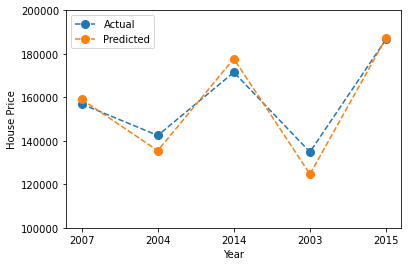

In [73]:
# Plot the prediction results.
plt.plot(result_h_1, linestyle = '--', marker = 'o', markersize = 8 )
plt.ylim(100000, 200000)
plt.legend(['Actual','Predicted'])
plt.xlabel('Year')
plt.xticks(np.arange(n), name) 
plt.ylabel('House Price')
plt.show()

## <span style='color:blue'> Step 4 Linear Regression Model - Chicago</span>

In [74]:
# Declare X_c including three variables
X_c = data_mod_c_final.drop(['Chicago_house_price'], axis = 1)
# Declare a response variable y_c
y_c = data_mod_c_final.Chicago_house_price 
# Use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X_c 
scaler_c = pps.StandardScaler().fit(X_c)
# Declare a variable called X_c_scaled, and assign it the result of calling the transform() method with parameter X_c 
X_c_scaled = scaler_c.transform(X_c) 
# New training and test dataset for X_c
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c_scaled, y_c, test_size = 0.25, random_state = 1)
# running linear regression on model
lm_c = linear_model.LinearRegression()
model_c = lm_c.fit(X_c_train, y_c_train)
#compute predicted y_c_pred from model
y_c_pred = lm_c.predict(X_c_test)
#check variance and absolute mean errors
variance_c = explained_variance_score(y_c_test,y_c_pred)
absmean_c = mean_absolute_error(y_c_test,y_c_pred)
# print variance and absolute mean errors
print('Variance is: '+str(variance_c)+';'+' Absolute mean errors is:'+str(absmean_c)+'.')
# get intercept and print it
Intercept_c = lm_c.intercept_
print('Intercept is:'+str(Intercept_c))
#print coefficient
coeff_c = lm_c.coef_
print('Coefficient is:'+str(coeff_c))

Variance is: -0.00163858302293729; Absolute mean errors is:26569.127322469227.
Intercept is:221735.48157728277
Coefficient is:[-11176.3083456   12039.74952974  -9225.54747656]


In [75]:
# Display the prediction results.
result_c = pd.DataFrame({'Actual':y_c_test, 'Predicted': y_c_pred})
result_c

,Actual,Predicted
Date,,
2007,279712.083333,227761.110998
2004,239666.416667,210086.971003
2014,203779.416667,223822.580760
2003,222490.500000,206769.100555
2015,210097.250000,225647.905076


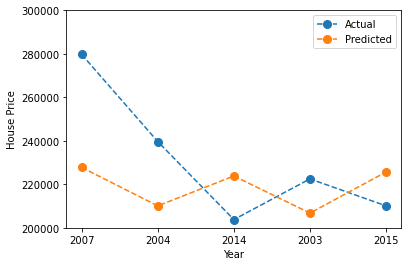

In [76]:
# Plot the prediction results.
plt.plot(result_c, linestyle = '--', marker = 'o', markersize = 8 )
plt.ylim(200000, 300000)
plt.legend(['Actual','Predicted'])
plt.xlabel('Year')
plt.ylabel('House Price')
plt.show()

# Section 4: House Price Time Series Analysis

In [77]:
# Import related modules
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## <span style='color:blue'>Step1: Two seperate time series for Chicago and Houston house price house_c and house_h has been created earlier.</span>
(house_c = df_two_city_ts['Chicago'])
(house_h = df_two_city_ts['Houston'])

## <span style='color:blue'>Step2: Check house price time series is stationary or not.</span>


In [78]:
# Compute and print the autocorrelation of house price
autocorrelation_c = house_c.autocorr(lag = 3)
print("The autocorrelation of Chicago house price is %4.2f" %(autocorrelation_c))
autocorrelation_h = house_h.autocorr(lag = 3)
print("The autocorrelation of Houston house price is %4.2f" %(autocorrelation_h))

The autocorrelation of Chicago house price is 0.99
The autocorrelation of Houston house price is 1.00


In [79]:
# Define a function to run rolling mean, rolling standard deviation variation with time. And calculate ADF statistic to determine whether a given time series is stationary or not.
def get_stationarity(timeseries):
    # rolling statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    # rolling statistics plot
    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

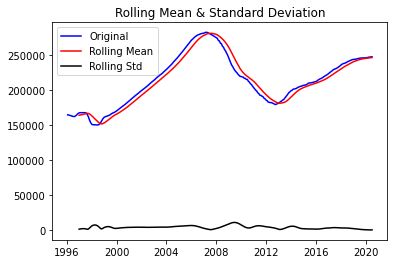

ADF Statistic: -2.743111756487362
p-value: 0.0668705107489899
Critical Values:
	1%: -3.4541800885158525
	5%: -2.872031361137725
	10%: -2.5723603999791473


In [80]:
# check Chicago house price is stationary or not.
get_stationarity(house_c)

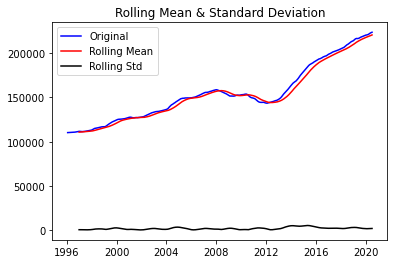

ADF Statistic: -0.2864468062292527
p-value: 0.927402056623277
Critical Values:
	1%: -3.4541800885158525
	5%: -2.872031361137725
	10%: -2.5723603999791473


In [81]:
# check Houston house price is stationary or not.
get_stationarity(house_h)

### Houston house price is not stationary, while Chicago house price is pseudo stationary.

## <span style='color:blue'>Step3: Make Houston house price time series stationary.</span>

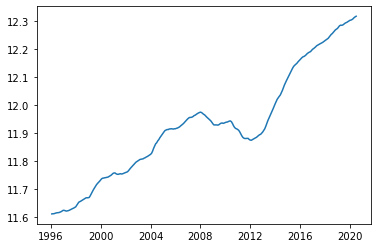

In [82]:
# Houston house price is not stationary, take the log of variable.
house_h_log = np.log(house_h)
plt.plot(house_h_log)

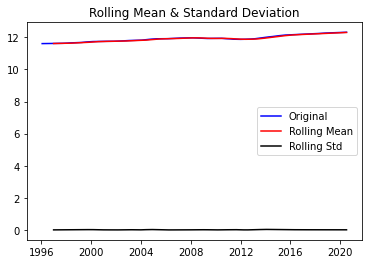

ADF Statistic: -0.729049081885631
p-value: 0.8390810202349528
Critical Values:
	1%: -3.4541800885158525
	5%: -2.872031361137725
	10%: -2.5723603999791473


In [83]:
get_stationarity(house_h_log)
# the log of house_h is not stationary too.

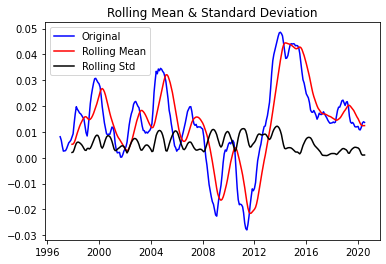

ADF Statistic: -2.864940965862279
p-value: 0.04957942048612151
Critical Values:
	1%: -3.455175292841607
	5%: -2.8724677563219485
	10%: -2.57259315846006


In [84]:
#subtract the mean, and the series is stationary.
rolling_mean = house_h_log.rolling(window = 12).mean()
house_h_log_minus_mean = house_h_log - rolling_mean
house_h_log_minus_mean.dropna(inplace = True)
get_stationarity(house_h_log_minus_mean)

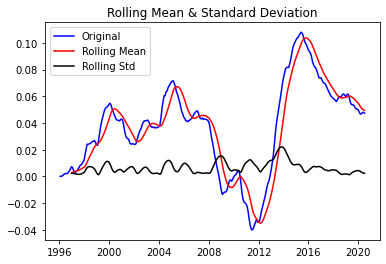

ADF Statistic: -3.025022407399456
p-value: 0.032622781729367945
Critical Values:
	1%: -3.4541800885158525
	5%: -2.872031361137725
	10%: -2.5723603999791473


In [85]:
#try other method, apply exponential decay to see if the time series is getting to stationary.
rolling_mean_exp_decay = house_h_log.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
house_h_log_exp_decay = house_h_log - rolling_mean_exp_decay
house_h_log_exp_decay.dropna(inplace = True)
get_stationarity(house_h_log_exp_decay)

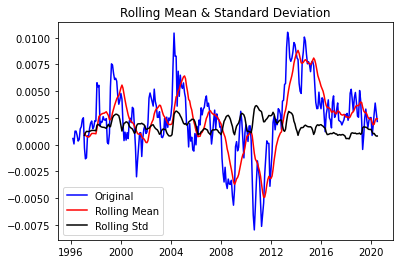

ADF Statistic: -2.4875610459888127
p-value: 0.11853026587122534
Critical Values:
	1%: -3.4542672521624214
	5%: -2.87206958769775
	10%: -2.5723807881747534


In [86]:
#try third method, apply time shif to see if the time series is getting to stationary.
house_h_log_shift = house_h_log - house_h_log.shift()
house_h_log_shift.dropna(inplace=True)
get_stationarity(house_h_log_shift)

## <span style='color:blue'>Step4: Calculalte ACF, PACF to dertermine the parameter AR(p),I(d), MA(q) for ARIMA model.</span>

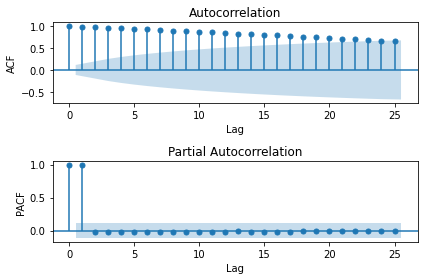

In [87]:
# Plot the ACF and PACF for Houston house price
fig, axes = plt.subplots(2,1)
# Plot the ACF
plot_acf(house_h, lags=25, ax=axes[0])
axes[0].set(xlabel='Lag',ylabel='ACF')
# Plot the PACF
plot_pacf(house_h, lags=25, ax=axes[1])
axes[1].set(xlabel='Lag',ylabel='PACF')
fig.tight_layout()
plt.show()

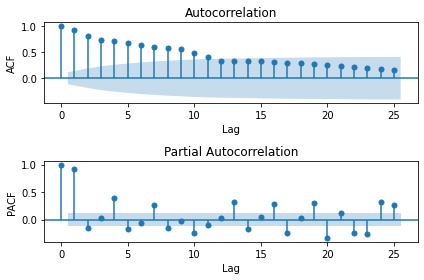

In [88]:
# Take first difference of the Houston house price series
chg_house_h = house_h.diff()
chg_house_h = chg_house_h.dropna()
# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)
# Plot the ACF
plot_acf(chg_house_h, lags=25, ax=axes[0])
axes[0].set(xlabel='Lag',ylabel='ACF')
# Plot the PACF
plot_pacf(chg_house_h, lags=25, ax=axes[1])
axes[1].set(xlabel='Lag',ylabel='PACF')
fig.tight_layout()
plt.show()

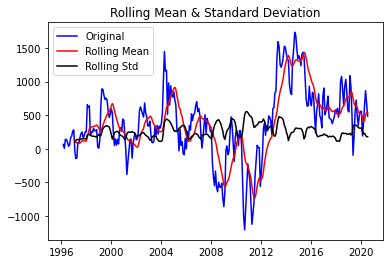

ADF Statistic: -2.3011951311378804
p-value: 0.17158280766554523
Critical Values:
	1%: -3.4542672521624214
	5%: -2.87206958769775
	10%: -2.5723807881747534


In [89]:
get_stationarity(chg_house_h)

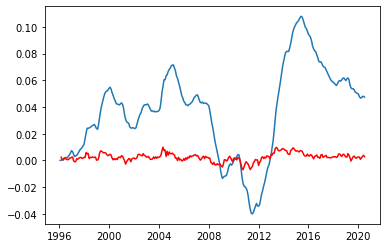

In [90]:
# create and fit an ARIMA model with AR of order 1, differencing of order 1 and MA of order 1.
decomposition = seasonal_decompose(house_h_log) 
model = ARIMA(house_h_log, order=(1,1,1),freq=house_c.index.inferred_freq)
results = model.fit(disp=-1)
plt.plot(house_h_log_exp_decay)
plt.plot(results.fittedvalues, color='red')

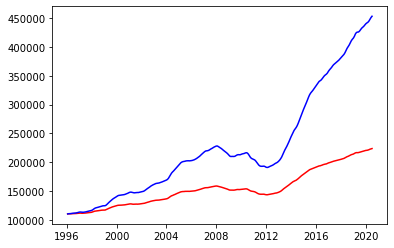

In [91]:
# Compare model to the original time series
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(house_h_log, index=house_h_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(house_h, color='r')
plt.plot(predictions_ARIMA, color='b')

## <span style='color:blue'>Step5: Final ARIMA model for Houston house.</span>
Considering our time series is univariate time series with trend and without seasonal components, decided to use ARIMA(1,1,1) model on the original data.

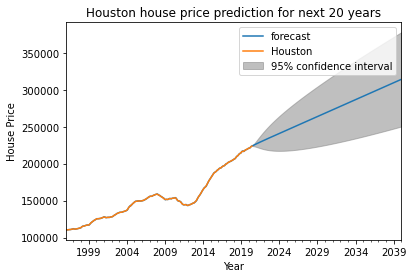

In [92]:
# Forecast future 20 years house price in Houston using an ARIMA(1,1,1) model
mod = ARIMA(house_h, order = (1,1,1),freq=house_h.index.inferred_freq)
res = mod.fit()
#Plot the original series and the forecasted series
res.plot_predict(start = '1996', end = '2040')
plt.title('Houston house price prediction for next 20 years')
plt.xlabel('Year')
plt.ylabel('House Price')
plt.show()

## <span style='color:blue'>Step6: Time series staionary analysis for Chicago house price.</span>

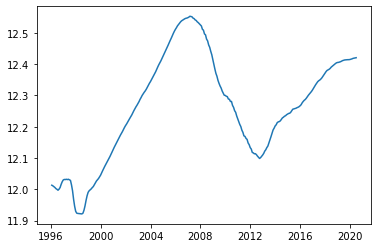

In [93]:
# take the log of Chicago house price.
house_c_log = np.log(house_c)
plt.plot(house_c_log)

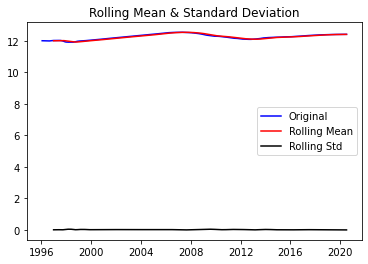

ADF Statistic: -2.6783366278056975
p-value: 0.07786258221675199
Critical Values:
	1%: -3.4540935579190495
	5%: -2.8719934111688965
	10%: -2.5723401594120388


In [94]:
get_stationarity(house_c_log)
# the log of house_c is not stationary too.

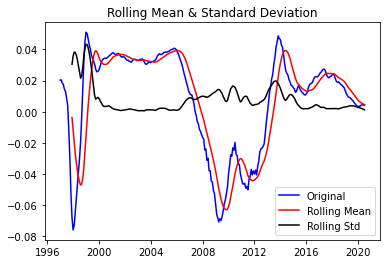

ADF Statistic: -2.127402432705938
p-value: 0.23363963488325595
Critical Values:
	1%: -3.455175292841607
	5%: -2.8724677563219485
	10%: -2.57259315846006


In [95]:
#subtract the mean, and the series is stationary.
rolling_mean = house_c_log.rolling(window = 12).mean()
house_c_log_minus_mean = house_c_log - rolling_mean
house_c_log_minus_mean.dropna(inplace = True)
get_stationarity(house_c_log_minus_mean)

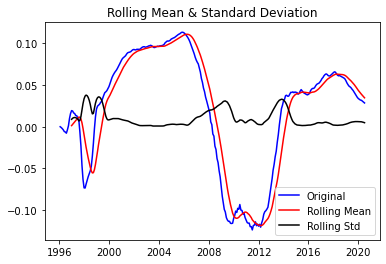

ADF Statistic: -2.3139551754444287
p-value: 0.16750664349665345
Critical Values:
	1%: -3.4540935579190495
	5%: -2.8719934111688965
	10%: -2.5723401594120388


In [96]:
#try other method, apply exponential decay to see if the time series is getting to stationary.
rolling_mean_exp_decay = house_c_log.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
house_c_log_exp_decay = house_c_log - rolling_mean_exp_decay
house_c_log_exp_decay.dropna(inplace = True)
get_stationarity(house_c_log_exp_decay)

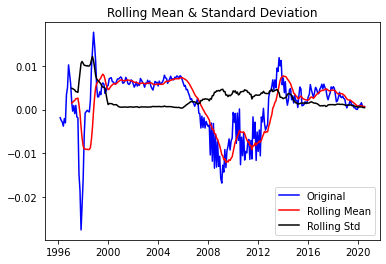

ADF Statistic: -1.5821352882416948
p-value: 0.4925610309754101
Critical Values:
	1%: -3.4542672521624214
	5%: -2.87206958769775
	10%: -2.5723807881747534


In [97]:
#try third method, apply time shif to see if the time series is getting to stationary.
house_c_log_shift = house_c_log - house_c_log.shift()
house_c_log_shift.dropna(inplace = True)
get_stationarity(house_c_log_shift)

## <span style='color:blue'>Step7: As log of data, exponential, time shift only makes data less stationary, decided to use the original data to calculalte ACF, PACF to dertermine the parameter AR(p),I(d), MA(q) for ARIMA model.</span>

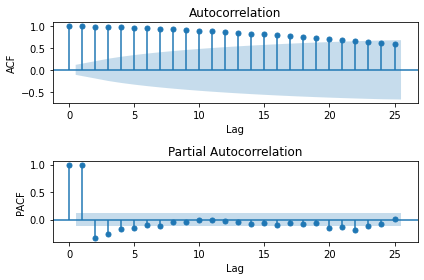

In [98]:
# Plot the ACF and PACF for Houston house price
fig, axes = plt.subplots(2,1)
# Plot the ACF
plot_acf(house_c, lags = 25, ax = axes[0])
axes[0].set(xlabel = 'Lag',ylabel = 'ACF')
# Plot the PACF
plot_pacf(house_c, lags = 25, ax = axes[1])
axes[1].set(xlabel = 'Lag',ylabel = 'PACF')
fig.tight_layout()
plt.show()

## <span style='color:blue'>Step8: Final ARIMA model for Chicago house.</span>
Considering our time series is univariate time series with trend and without seasonal components, decided to use ARIMA(1,1,1) model on the original data.

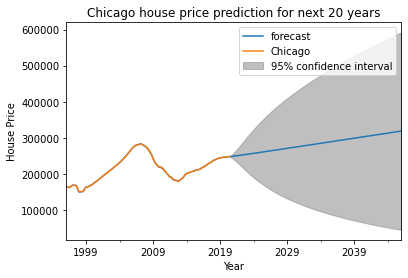

In [99]:
# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(house_c, order = (1,1,1),freq = house_c.index.inferred_freq)
res = mod.fit()
# Plot the original series and the forecasted series
res.plot_predict(start = '1996', end = '2046')
plt.title('Chicago house price prediction for next 20 years')
plt.xlabel('Year')
plt.ylabel('House Price')
plt.show()